<a href="https://colab.research.google.com/github/luisgls/ModEvoCourse/blob/main/VCFanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Necessary Packages
install.packages("BiocManager")
install.packages("ggplot2")
install.packages("data.table")
install.packages("dplyr")
install.packages("vcfR")
install.packages("stringr")
install.packages("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘permute’, ‘ape’, ‘memuse’, ‘pinfsc50’, ‘vegan’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
BiocManager::install("S4Vectors")
BiocManager::install("IRanges")
BiocManager::install("GenomeInfoDb")
BiocManager::install("XVector")
BiocManager::install("Biostrings")
BiocManager::install("GenomicRanges")
BiocManager::install("Rsamtools")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'S4Vectors'

also installing the dependency ‘BiocGenerics’


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'IRanges'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'GenomeInfoDb'

also installing the dependencies ‘UCSC.

In [ ]:
# Installing devtools if not already installed
if(!require(devtools)) install.packages("devtools")

# Using devtools to install dndscv
#library(devtools); install_github("im3sanger/dndscv")

# Load Libraries
# Force library to reload the dndscv package
#library(dndscv, lib.loc = .libPaths())

# Load Libraries
library(ggplot2)
library(dndscv)
library(vcfR)
library(tibble)
library(dplyr)
library(tidyr)
library(cowplot)
library(stringr)

Loading required package: devtools

Loading required package: usethis




RCurl        (NA -> 1.98-1.16) [CRAN]
RcppArmad... (NA -> 14.2.2-1 ) [CRAN]
sp           (NA -> 2.1-4    ) [CRAN]
pixmap       (NA -> 0.4-13   ) [CRAN]
segmented    (NA -> 2.1-3    ) [CRAN]
ade4         (NA -> 1.7-22   ) [CRAN]
plyr         (NA -> 1.8.9    ) [CRAN]
poilog       (NA -> 0.4.2.1  ) [CRAN]
seqinr       (NA -> 4.2-36   ) [CRAN]


Skipping 12 packages ahead of CRAN: zlibbioc, IRanges, S4Vectors, BiocGenerics, GenomeInfoDbData, GenomeInfoDb, XVector, Rhtslib, BiocParallel, Biostrings, GenomicRanges, Rsamtools

Installing 9 packages: RCurl, RcppArmadillo, sp, pixmap, segmented, ade4, plyr, poilog, seqinr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpmQQPIK/remotes1144ea86295/im3sanger-dndscv-ae10c76/DESCRIPTION’ ... OK
* preparing ‘dndscv’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘dndscv_0.0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“replacing previous import ‘Biostrings::translate’ by ‘seqinr::translate’ when loading ‘dndscv’”

   *****       ***   vcfR   ***       *****
   This is vcfR 1.15.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
vcf_files <- Sys.glob(file.path(".","*.vcf"))
vcf_names <- sub(".vcf","",sub("\\.\\/","", vcf_files))
vcf_names <- sub(".filtered","",sub("\\.\\/","", vcf_files))
vcf_data <- lapply(vcf_files, function(vcf) {
  v <- read.vcfR(vcf)
  v <- extract.indels(v)
  v <- v[is.biallelic(v),]
})
names(vcf_data) <- vcf_names

Scanning file to determine attributes.
File attributes:
  meta lines: 3429
  header_line: 3430
  variant count: 24756
  column count: 11
Meta line 3429 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 24756
  Character matrix gt cols: 11
  skip: 0
  nrows: 24756
  row_num: 0
Processed variant: 24756
All variants processed
Scanning file to determine attributes.
File attributes:
  meta lines: 3429
  header_line: 3430
  variant count: 32850
  column count: 11
Meta line 3429 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 32850
  Character matrix gt cols: 11
  skip: 0
  nrows: 32850
  row_num: 0
Processed variant: 32850
All variants processed
Scanning file to determine attributes.
File attributes:
  meta lines: 3429
  header_line: 3430
  variant count: 26033
  column count: 11
Meta line 3429 read in.
All meta lines processed.
gt matrix initialized.
Character 

In [ ]:
gt_fields <-  lapply(vcf_data, function(vcf) {
  extract_gt_tidy(vcf)})

fix_fields <- lapply(vcf_data, function(vcf) {
  vcf@fix %>% tibble::as_tibble()
})

merged_list <- mapply(c, fix_fields, gt_fields, SIMPLIFY = FALSE)

allwithVAF<-lapply(merged_list,  function(test) {
  test2 <- as_tibble(cbind(test$CHROM,test$POS,test$REF,test$ALT,test$FILTER,test$gt_AF,test$gt_DP,test$gt_AD))

  test2 <- test2 %>% separate(V8,into = c("ref","alt")) %>% mutate(ref_count=as.numeric(ref),alt_count=as.numeric(alt),depth=as.numeric(V7)) %>% mutate(VAF=alt_count/(ref_count+alt_count+1))

  test2 <- test2 %>% dplyr::select(V1,V2,V3,V4,V5,ref_count,alt_count,depth,VAF)
})

df_allwithVAF <- bind_rows(allwithVAF, .id = "name")


In [ ]:
df_allwithVAF <- df_allwithVAF %>% dplyr::rename(chr=V1,pos=V2,ref=V3,alt=V4,FILTER=V5)

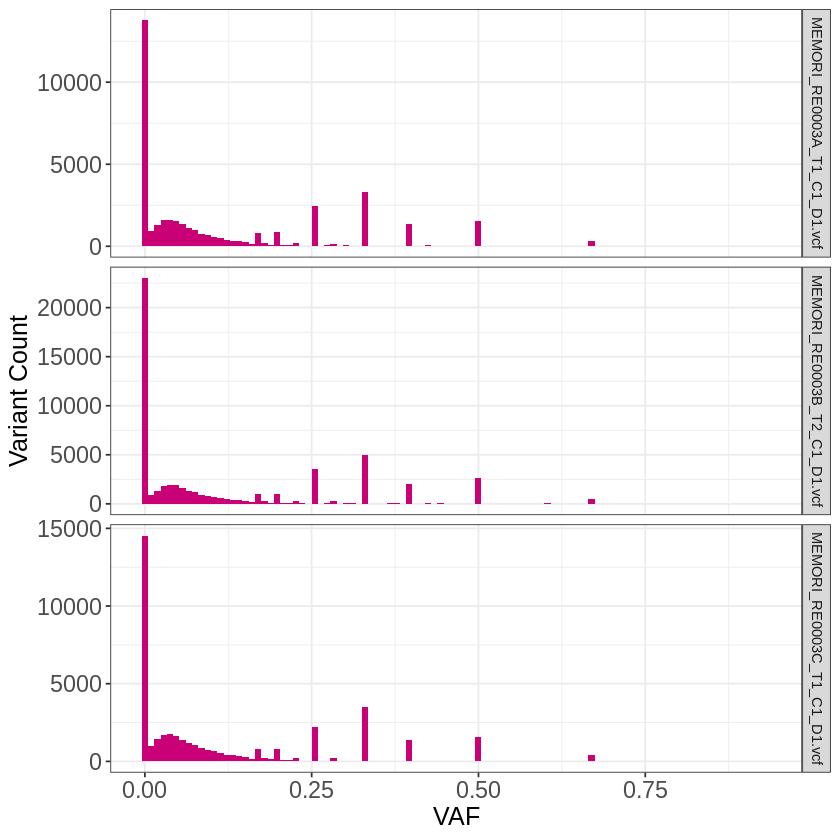

In [ ]:
ggplot(df_allwithVAF, mapping = aes(x = VAF)) +
  geom_histogram(bins = 100, fill = "#c90076") +
  theme_bw() +
  xlab("VAF") +
  ylab("Variant Count") +
  theme(axis.title.x = element_text(size = 15), axis.title.y = element_text(size = 15), ) +
  theme(axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)) + facet_grid("name",scales = "free_y")

In [ ]:
df_allwithVAF_filt <-df_allwithVAF %>% filter(VAF!=0, FILTER=="PASS")

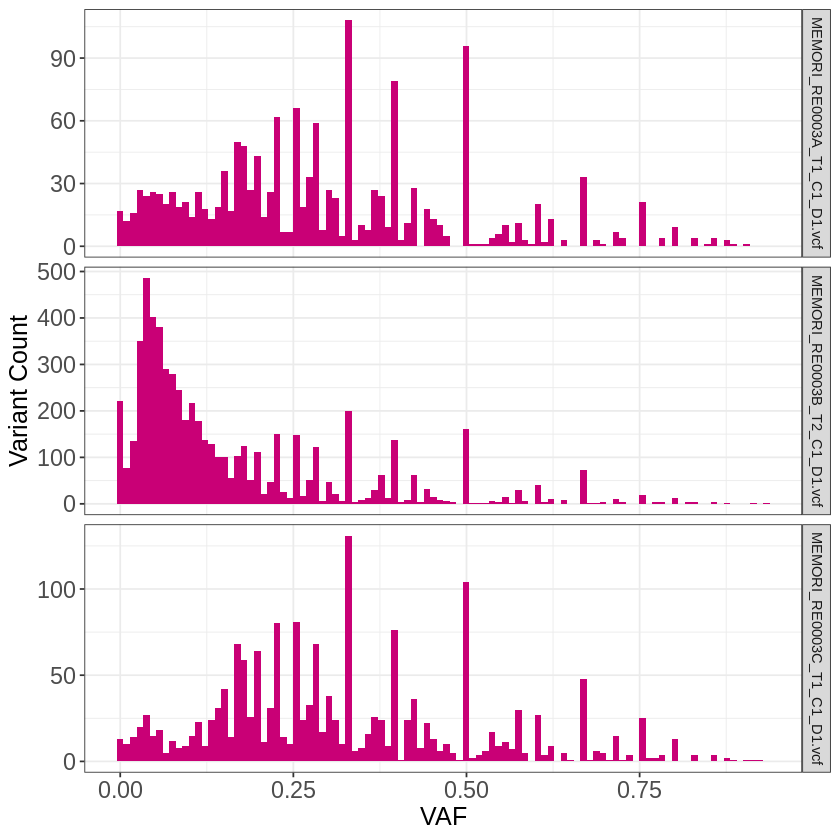

In [ ]:
ggplot(df_allwithVAF_filt, mapping = aes(x = VAF)) +
  geom_histogram(bins = 100, fill = "#c90076") +
  theme_bw() +
  xlab("VAF") +
  ylab("Variant Count") +
  theme(axis.title.x = element_text(size = 15), axis.title.y = element_text(size = 15), ) +
  theme(axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)) + facet_grid("name",scales = "free_y")

In [ ]:
df_allwithVAF_filt

name,chr,pos,ref,alt,FILTER,ref_count,alt_count,depth,VAF
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
MEMORI_RE0003A_T1_C1_D1.vcf,chr1,1810077,T,A,PASS,3,8,11,0.66666667
MEMORI_RE0003A_T1_C1_D1.vcf,chr1,1886934,C,A,PASS,7,3,10,0.27272727
MEMORI_RE0003A_T1_C1_D1.vcf,chr1,2040230,G,A,PASS,4,2,6,0.28571429
MEMORI_RE0003A_T1_C1_D1.vcf,chr1,2606146,C,T,PASS,40,15,55,0.26785714
MEMORI_RE0003A_T1_C1_D1.vcf,chr1,3509355,C,A,PASS,12,2,14,0.13333333
MEMORI_RE0003A_T1_C1_D1.vcf,chr1,3509374,C,A,PASS,9,2,11,0.16666667
MEMORI_RE0003A_T1_C1_D1.vcf,chr1,8486089,C,T,PASS,10,7,17,0.38888889
MEMORI_RE0003A_T1_C1_D1.vcf,chr1,8864225,C,T,PASS,16,10,26,0.37037037
MEMORI_RE0003A_T1_C1_D1.vcf,chr1,10418689,C,T,PASS,20,5,25,0.19230769


In [ ]:
##Analysis annotation dndsCV
install.packages("stringr")
library("stringr")

df_allwithVAF_filt_dndscvin <- df_allwithVAF_filt %>% select(name,chr,pos,ref,alt) %>% mutate(chr = str_replace(chr, "chr", "")) %>% unique()

df_allwithVAF_filt_dndscvout <- dndscv(df_allwithVAF_filt_dndscvin, refdb = "/content/RefCDS_human_GRCh38_GencodeV18_recommended.rda", cv=NULL, outmats = T, max_muts_per_gene_per_sample = Inf, max_coding_muts_per_sample = Inf)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

[1] Loading the environment...

[2] Annotating the mutations...

Warning message in dndscv(df_allwithVAF_filt_dndscvin, refdb = "/content/RefCDS_human_GRCh38_GencodeV18_recommended.rda", :
“Mutations observed in contiguous sites within a sample. Please annotate or remove dinucleotide or complex substitutions for best results.”
Warning message in dndscv(df_allwithVAF_filt_dndscvin, refdb = "/content/RefCDS_human_GRCh38_GencodeV18_recommended.rda", :
“Same mutations observed in different sampleIDs. Please verify that these are independent events and remove duplicates otherwise.”
[3] Estimating global rates...

[4] Running dNdSloc...

[5] Running dNdScv...

    Regression model for substitutions: no covariates were used (theta = 0.112).



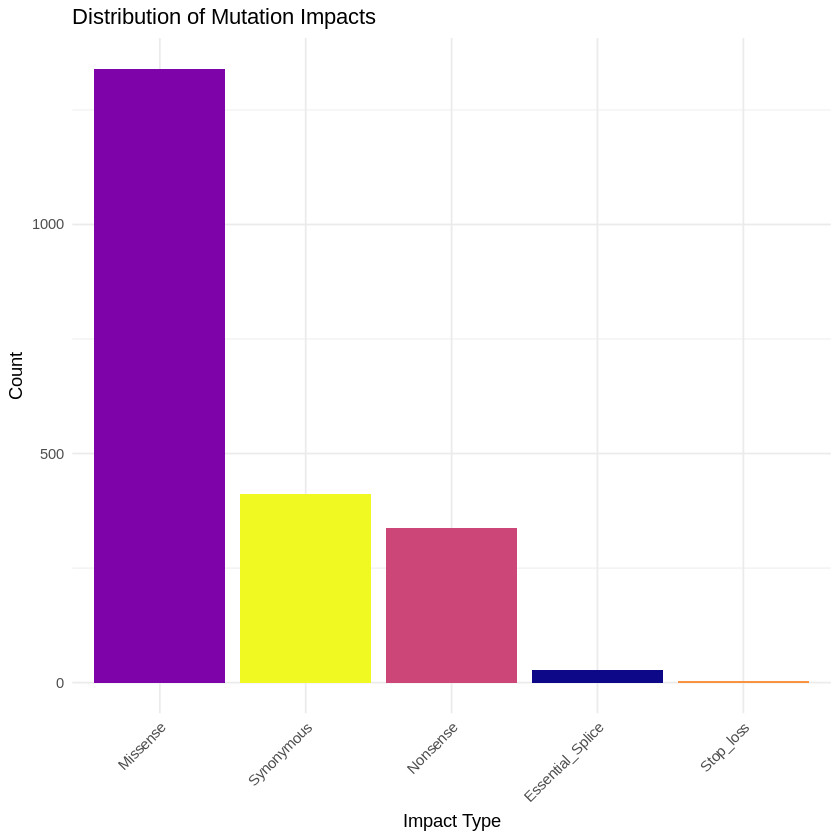

In [ ]:
data<-df_allwithVAF_filt_dndscvout$annotmuts

# Count the occurrences of each impact type
impact_summary <- data %>%
  count(impact) %>%
  mutate(proportion = n / sum(n))

# Create a bar plot for the impact column
ggplot(impact_summary, aes(x = reorder(impact, -n), y = n, fill = impact)) +
  geom_bar(stat = "identity") +
  scale_fill_viridis_d(option = "C") + # Use a pleasant color scale
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none" # Remove legend since x-axis labels already explain
  ) +
  labs(
    title = "Distribution of Mutation Impacts",
    x = "Impact Type",
    y = "Count",
    fill = "Impact"
  )


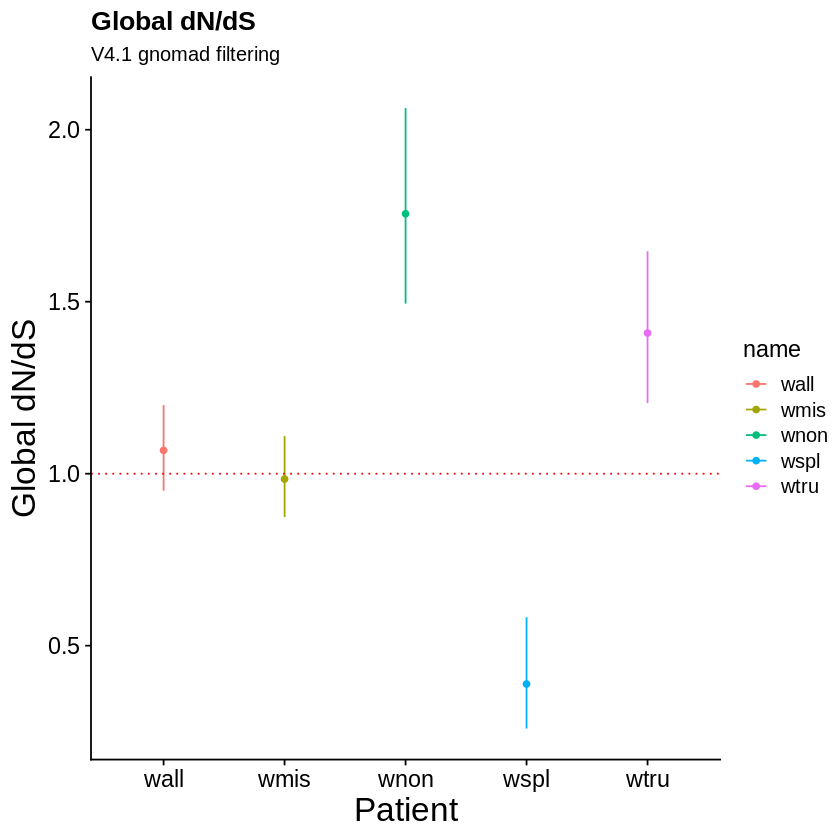

In [ ]:
plotdnds<-function(x){

ggplot(x$globaldnds, aes(x = name,  y = mle)) +
  geom_errorbar(aes(ymin=cilow, ymax=cihigh, colour = name),
                width=0,
                position=position_dodge(0.78)) +
  geom_point(aes(colour = name),
             position = position_dodge(0.78),
             size = 1.5) +
  cowplot::theme_cowplot() +
  geom_hline(yintercept = 1, linetype = "dotted", colour = "red")+
  xlab(label = "Patient") +
  ylab(label = "Global dN/dS") +
  ggtitle("Global dN/dS") +
  theme(axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 14),
        axis.text.y = element_text(size = 14))
}

plotdnds(df_allwithVAF_filt_dndscvout)

In [ ]:
df_allwithVAF_filt_dndscvout$sel_cv

,gene_name,n_syn,n_mis,n_non,n_spl,wmis_cv,wnon_cv,wspl_cv,pmis_cv,ptrunc_cv,pallsubs_cv,qmis_cv,qtrunc_cv,qallsubs_cv
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10016,MUC3A,0,3,7,0,6.567289,160.7845,160.7845,3.570091e-02,1.612022e-08,2.862603e-08,0.9043554,0.0003097662,0.0005500778
10015,MUC22,0,0,4,0,0.000000,139.6113,139.6113,4.768226e-01,5.706270e-06,2.886116e-06,0.9043554,0.0274129197,0.0277298062
16978,TMEM51,0,1,3,0,27.069335,522.8430,522.8430,3.068164e-02,1.080817e-06,6.308329e-06,0.9043554,0.0103844860,0.0320192819
14106,RRAD,0,0,3,0,0.000000,412.2329,412.2329,7.556109e-01,2.030996e-06,6.665129e-06,0.9043554,0.0130092034,0.0320192819
13135,PTRHD1,0,2,2,0,93.598840,541.5243,541.5243,6.816605e-04,1.926499e-05,1.517393e-05,0.5658090,0.0616993301,0.0583164556
18543,ZDHHC5,0,0,3,0,0.000000,196.5121,196.5121,6.626993e-01,1.657842e-05,3.382429e-05,0.9043554,0.0616993301,0.1083279405
4950,EMP3,0,3,1,0,135.076448,268.6617,268.6617,6.266802e-05,2.427632e-03,5.663033e-05,0.3010572,0.9698405168,0.1554583400
15561,SPANXN3,0,3,0,0,228.918743,0.0000,0.0000,1.486890e-05,9.178888e-01,7.767011e-05,0.2446052,0.9698405168,0.1865636161
1035,ARL6,0,3,0,0,188.824764,0.0000,0.0000,2.545849e-05,9.322559e-01,1.334270e-04,0.2446052,0.9698405168,0.2741292826


In [ ]:
df_results_all_genes<-read.csv("/content/combined_ALL.dndscv.results copy", sep = "\t")
df_results_all_genes

gene_name,n_syn,n_mis,n_non,n_spl,wmis_cv,wnon_cv,wspl_cv,pmis_cv,ptrunc_cv,pallsubs_cv,qmis_cv,qtrunc_cv,qallsubs_cv
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TP53,4,519,94,0,39.9822712,77.8300707,77.8300707,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
FBXW7,6,140,54,0,8.7499268,20.4872074,20.4872074,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
SMAD4,7,131,21,0,8.7007789,13.6158953,13.6158953,0.000000e+00,5.130341e-13,0.000000e+00,0.000000e+00,1.145263e-09,0.000000e+00
NRAS,5,66,0,0,12.5677590,0.0000000,0.0000000,0.000000e+00,2.708556e-01,0.000000e+00,0.000000e+00,8.217925e-01,0.000000e+00
BRAF,4,210,4,0,15.4116605,1.7614442,1.7614442,0.000000e+00,3.587736e-01,0.000000e+00,0.000000e+00,8.217925e-01,0.000000e+00
PIK3CA,7,344,3,0,14.9204240,0.6493386,0.6493386,0.000000e+00,4.804767e-01,0.000000e+00,0.000000e+00,8.229756e-01,0.000000e+00
KRAS,10,432,1,0,55.9380218,1.0582565,1.0582565,0.000000e+00,9.565361e-01,0.000000e+00,0.000000e+00,9.806236e-01,0.000000e+00
SOX9,6,39,26,0,3.2036593,56.9069067,56.9069067,1.169883e-04,0.000000e+00,0.000000e+00,8.135937e-02,0.000000e+00,0.000000e+00
APC,22,133,710,0,1.8763780,80.5352199,80.5352199,1.191438e-03,0.000000e+00,0.000000e+00,2.281703e-01,0.000000e+00,0.000000e+00
